# Week-4 : Distributions

Let's start with a discussion of distributions. And we'll start with the most common using a coin. When a coin is flipped it has a probability of landing heads up and a probability of landing tails up. If we flip a coin many times we collect a number of measurements of the heads and tails that landed face up and intuitively we know that the number of times we get a heads up will be equal about the number of times we get a tails up for a fair coin. If you flipped a coin a hundred times and you received heads each time you'd probably doubt the fairness of that coin. We can consider the result of each flip of this coin as a random variable.

**When we can consider the set of all possible random variables together we call this a distribution.**  
  
  In this case the distribution is called binomial since there's two possible outputs a heads or a tails. It's also an example of a discreet distribution since there are only categories being used a heads and a tails and not real numbers.

NumPy actually has some distributions built into it allowing us to make random flips of a coin with given parameters. Let's give it a try.

In [1]:
import pandas as pd
import numpy as np

In [4]:
np.random.binomial(1,0.5) # Running one round of flip with P(H)= 0.5 ,0 refers to Head and 1 refers to Tail

1

In [7]:
np.random.binomial(1000,0.5)/1000 #Running 1000 times and dividing the result by 1000

0.532

In [9]:
#Flip 20 times with P(H)=0.5. Run the experiment for 10000 times check mean of value greater than 15
x=np.random.binomial(20,0.5,10000)
print((x>15).mean())

0.0048


In [14]:
chance_of_tornado=0.01/100
np.random.binomial(1000000,chance_of_tornado)

93

Let's take one more example. Let's say the chance of a tornado here in Ann Arbor on any given day, is 1% regardless of the time of year. That's higher than realistic but it makes for a quicker demo. And lets say if there's a tornado I'm going to get away from the windows and hide, then come back and do my recording the next day. So what's the chance of this happening two days in a row?

In [2]:
chance_of_tornado=0.01 
no_of_simulations=1000000
tornado_events=np.random.binomial(1,chance_of_tornado,no_of_simulations)

two_days_in_a_row= 0
for i in range(1,len(tornado_events)-1):
    if tornado_events[i]==1 & tornado_events[i-1]==1:
        two_days_in_a_row+=1
print("{} tornadoes back to back in {} years".format(two_days_in_a_row,no_of_simulations/365))

103 tornadoes back to back in 2739.72602739726 years


Many of the distributions you use in data science are not discrete binomial, and instead are continues where the value of the given observation isn't a category like heads or tails, but can be represented by a real number. It's common to then graph these distributions when talking about them, where the x axis is the value of the observation and the y axis represents the probability that a given observation will occur.  

If all numbers are equally likely to be drawn when you sample from it, this should be graphed as a flat horizontal line. And this flat line is actually called the uniform distribution.  

**Let's take the normal distribution which is also called Gaussian Distribution or sometimes, a Bell Curve.**



One of the properties of this distribution is that the mean is zero, not the two curves on either side are symmetric. I want to introduce you to the term expected value. I think that most of us are familiar with the mean is the sum of all the values divided by the total number of values. Calculating a mean values are computational process, and it takes place by looking at samples from distribution. For instance rolling a die three times might give you 1, 2 and 6, the mean value is then 4.5. The expected value is the probability from the underlying distribution is what would be the mean of a die roll if we did an infinite number of rolls. The result is 3.5 since each face of the die is equally likely to appear. Thus the expected value is 3.5, while the mean value depends upon the samples that we've taken, and converges to the expected value given a sufficiently large sample set. 

Let's draw 1,000 samples from a normal distribution with an expected value of 0.75 and a standard deviation of 1. 

In [4]:
distribution=np.random.normal(0.75,size=1000)
np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0145785363720632

Now we don't normally have to do all this work ourselves, but I wanted to show you how you can sample from the distribution, create a precise programmatic description of a formula, and apply it to your data. But for standard deviation, which is just one particular measure of variability, NumPy has a built-in function that you can apply, called STD.

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [5]:
np.std(distribution)

1.0145785363720632

There's a couple more measures of distribution that are interesting to talk about. One of these is the shape of the tales of the distribution and this is called the kurtosis. We can measure the kurtosis using the statistics functions in the SciPy package. A negative value means the curve is slightly more flat than a normal distribution, and a positive value means the curve is slightly more peaky than a normal distribution. Remember that we aren't measuring the kurtosis of the distribution per se, but of the thousand values which we sampled out of the distribution. This is a sublet but important distinction.

In [6]:
import scipy.stats as stats

stats.kurtosis(distribution)

-0.018262021798677974

We could also move out of the normal distributions and push the peak of the curve one way or the other. And this is called the skew.

In [7]:
stats.skew(distribution)

0.09416073285606075

In [9]:
chi_sq_df2=np.random.chisquare(2,size=100000)
stats.skew(chi_sq_df2)

1.985835515865022

In [10]:
chi_sq_df5=np.random.chisquare(5,size=100000)
stats.skew(chi_sq_df5)

1.2537052339467871

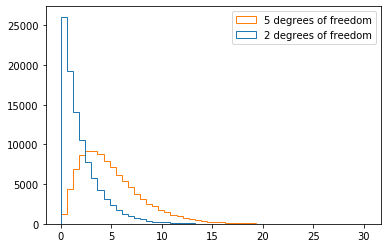

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_sq_df2,chi_sq_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')

The last aspect of distributions that I want to talk about is the modality. So far, all of the distributions I've shown have a single high point, a peak. But what if we have multiple peaks? This distribution has two high points, so we call it bimodal. These are really interesting distributions and happen regularly in data mining. We're going to talk a bit more about them in course three. But a useful insight is that we can actually model these using two normal distributions with different parameters. These are called Gaussian Mixture Models and are particularly useful when clustering data.

Remember that a distribution is just a shape that describes the probability of a value being pulled when we sample a population. And NumPy and SciPy each have a number of different distributions built in for us to be able to sample from.

### Hypothesis testing

We use statistics in a lot of different ways in data science. In this lecture, I want to refresh your knowledge of hypothesis testing, which is a core data analysis activity behind experimentation.

In [13]:
df=pd.read_csv("grades.csv")
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


If we take a look at the data frame inside, we see we have six different assignments. Each with a submission time and it looks like there just under 3,000 entries in this data file.   

For the purpose of this lecture, let's segment this population in to two pieces. Those who finish the first assignment by the end of December 2015 and those who finish it sometimes after that.

In [14]:
early=df[df['assignment1_submission']<='2015-12-31']
late=df[df['assignment1_submission']>'2015-12-31']

In [15]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [16]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

Note that the date time values are ignored as panda's knows this isn't a number, but an object type. 

When doing hypothesis testing, we have to choose a significance level as a threshold for how much of a chance we're willing to accept. This significance level is typically called alpha. It can vary greatly, depending on what you're going to do with the result and the amount of noise you expect in your data.